<a href="https://colab.research.google.com/github/Karlajack/Final_Capstone_Project/blob/main/Airline_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
 #Impoting general libraries
import warnings
import itertools
import random
from scipy.stats import uniform
warnings.filterwarnings("ignore")

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [134]:
rawdata=pd.read_csv('/content/customer_reviews_2024.csv', encoding='latin-1')

In [3]:
df=rawdata.copy()

In [4]:
#df.info()

In [5]:
df.drop(columns=['Would you like to receive updates from XX Airlines about offers, news, surveys, and any other communication?','Thank you for flying with XX Airlines. Please take a moment to give us feedback on your experience with us. Do you wish to continue?'],axis=1,inplace=True)

In [6]:
df=df.rename(columns={'On a scale of 0 to 10 (0-Less Likely, 10-Very Likely), How likely are you to recommend XX Airlines to a friend or colleague?':'recommend_scale','What impressed you about XX Airlinestoday?':'impressed_today',
                     'What can XX Airlines improve on that will delight you next time?':'improvement_recommendation',
                       'What did you not like about XX Airlines today?':'not_like_today','How satisfied were you with the overall experience, from boarding to destination airport?':"overall_experience",
             'Please state your country of residence':"residence_country"})

In [88]:
#df.isna().sum().sort_values(ascending=False)

In [7]:
df.shape


(481184, 20)

In [8]:
df['recommend_scale']=df['recommend_scale'].replace('-','no_response')



In [9]:
df['recommend_scale']=df['recommend_scale'].fillna('no_response')

In [90]:
#df['recommend_scale'].value_counts()

In [10]:
df['recommend_scale'].isna().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481184 entries, 0 to 481183
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Transaction ID              481184 non-null  float64
 1   Transaction timestamp       481184 non-null  object 
 2   Survey completion           443918 non-null  object 
 3   First Name                  88530 non-null   object 
 4   Last Name                   44517 non-null   object 
 5   Gender                      513 non-null     object 
 6   Phone number                481184 non-null  object 
 7   Tags                        9599 non-null    object 
 8   Start time(GMT)             481184 non-null  object 
 9   Time of last update(GMT)    481184 non-null  object 
 10  name                        443918 non-null  object 
 11  recommend_scale             481184 non-null  object 
 12  impressed_today             452787 non-null  object 
 13  improvement_re

In [12]:
df2=df[['Transaction ID','flight_date','origin','destination', 'residence_country','overall_experience','impressed_today',
                  'improvement_recommendation','not_like_today','recommend_scale']]

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481184 entries, 0 to 481183
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Transaction ID              481184 non-null  float64
 1   flight_date                 481184 non-null  object 
 2   origin                      480616 non-null  object 
 3   destination                 467355 non-null  object 
 4   residence_country           479322 non-null  object 
 5   overall_experience          475276 non-null  object 
 6   impressed_today             452787 non-null  object 
 7   improvement_recommendation  451267 non-null  object 
 8   not_like_today              458933 non-null  object 
 9   recommend_scale             481184 non-null  object 
dtypes: float64(1), object(9)
memory usage: 36.7+ MB


In [26]:
def map_recommend_scale( recommend_scale):
  if  recommend_scale=='no_response':
    return "No"
  else:
    return "Yes"

df2["response"] = df2["recommend_scale"].apply(map_recommend_scale)

<ipython-input-26-9bc1e435268b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["response"] = df2["recommend_scale"].apply(map_recommend_scale)


In [29]:
  df2[["response"]].value_counts()

,count
response,
No,436298
Yes,44886


In [30]:
df_response=df2[['Transaction ID','flight_date','origin','destination','response']]

df_response.dropna(inplace=True)




<ipython-input-30-a5be0ddb25b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_response.dropna(inplace=True)


In [188]:
# df_response['origin']=df_response['origin'].replace('-','no_response')
# df_response['origin']=df_response['origin'].fillna('no_response')
# df_response['destination']=df_response['destination'].replace('-','no_response')
# df_response['destination']=df_response['destination'].fillna('no_response')

In [185]:
df_response.isna().sum()

,0
Transaction ID,0
flight_date,0
origin,0
destination,0
response,0


In [31]:
response_grouped=df_response.groupby(['origin','destination'])['response'].value_counts()
df_response['route']=df_response['origin']+'-'+df_response['destination']
df_response.head()


<ipython-input-31-f218d6d256a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_response['route']=df_response['origin']+'-'+df_response['destination']


,Transaction ID,flight_date,origin,destination,response,route
0,52825240.0,1/1/2024,EBB,NBO,No,EBB-NBO
1,52825244.0,1/1/2024,EBB,NBO,No,EBB-NBO
2,52825248.0,1/1/2024,EBB,NBO,No,EBB-NBO
3,52825266.0,1/1/2024,AMS,NBO,No,AMS-NBO
4,52825260.0,1/1/2024,BOM,NBO,No,BOM-NBO


In [203]:
df_response.drop(df_response[df_response['route'].str.contains('no_response', case=False)].index, inplace=True)

<ipython-input-203-2a5bd55e2bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_response.drop(df_response[df_response['route'].str.contains('no_response', case=False)].index, inplace=True)


In [33]:
response_counts = df_response.groupby('route')['response'].value_counts().unstack(fill_value=0)
response_counts.sort_values(by='Yes',ascending=False).head(2)

response,No,Yes
route,,
NBO-JNB,15408,1595
JNB-NBO,17566,1535


In [60]:
response_counts['response_rate'] = response_counts['Yes'] / (response_counts['No'] + response_counts['Yes'])*100
response_counts['Total_surveys'] = response_counts['No'] + response_counts['Yes']
response_counts.sort_values(by='Total_surveys',ascending=False).head(50)

Response_survey=response_counts.sort_values(by='Total_surveys',ascending=False).head(2)
Response_survey

response,No,Yes,response_rate,Total_surveys
route,,,,
NBO-MBA,25004,1499,5.655963,26503
MBA-NBO,23005,1470,6.006129,24475


In [ ]:
df

In [213]:
# # Group responses by route and count occurrences
# response_counts = df_response.groupby('route')['response'].value_counts().unstack(fill_value=0)

# # Plot the bar chart
# fig = plt.figure(figsize=(50, 50))
# plt.bar(response_counts.iloc[:10].index,response_counts.iloc[:10],kind='bar', color=['maroon', 'blue'])  # Assuming two response categories
# plt.xlabel('Route')
# plt.ylabel('Count')
# plt.title('Response Counts by Route')
# plt.legend(title='Response')
# #plt.tight_layout()
# plt.ylim([0,100])
# # plt.show()

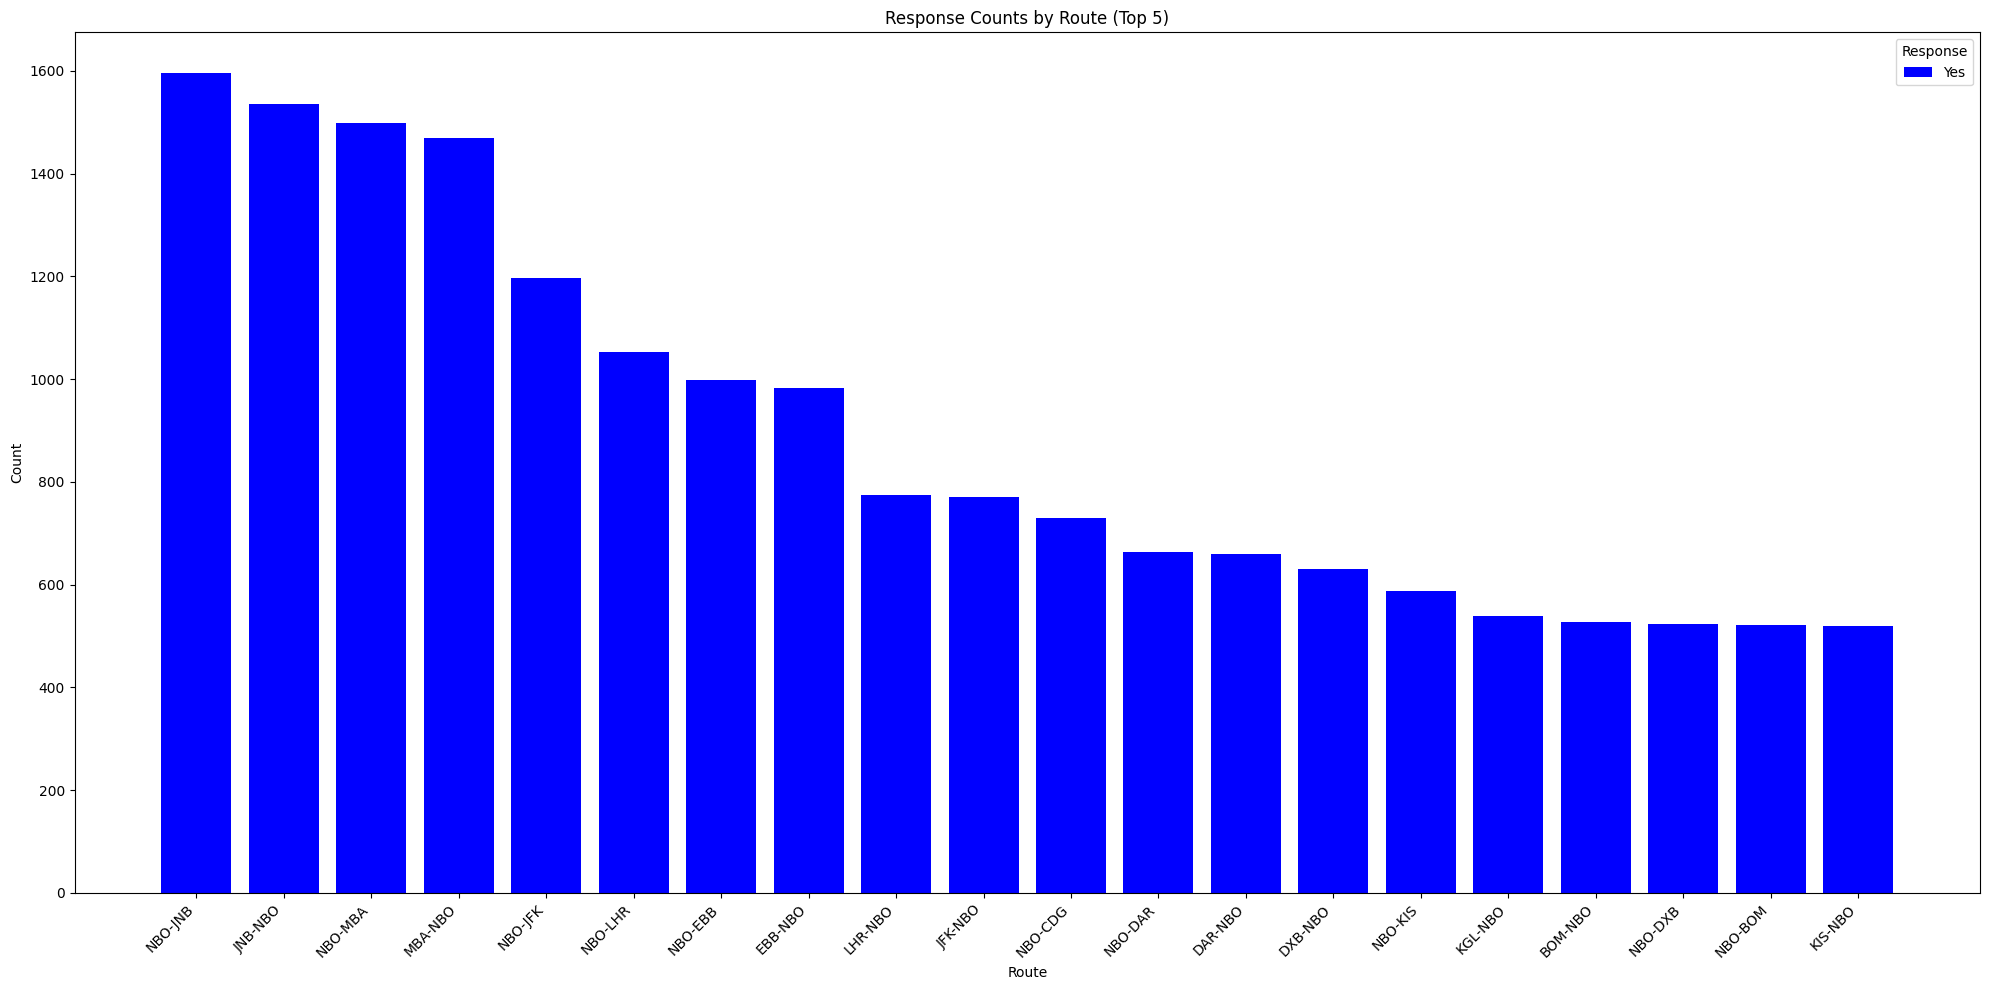

In [59]:
# Group responses by route and count occurrences
response_counts = df_response.groupby('route')['response'].value_counts().unstack(fill_value=0).sort_values(by='Yes', ascending=False)

# Plot the bar chart
fig = plt.figure(figsize=(20, 10))  # Adjusted figure size for better visualization

# Plot each response category separately
# plt.bar(response_counts.iloc[:100].index, response_counts.iloc[:100]['No'], label='No', color='maroon')
# plt.bar(response_counts.iloc[:100].index, response_counts.iloc[:100]['Yes'], bottom=response_counts.iloc[:100]['No'], label='Yes', color='blue')  # Stack 'Yes' on top of 'No'
plt.bar(response_counts.iloc[:20].index, response_counts.iloc[:20]['Yes'], label='Yes', color='blue')
#plt.bar(response_counts.iloc[:20].index, response_counts.iloc[:20]['No'], label='No', color='maroon')
plt.xlabel('Route')
plt.ylabel('Count')
plt.title('Response Counts by Route (Top 5)')
plt.legend(title='Response')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#Customer reviews

###'What impressed you about Airlines today?

In [118]:
df_impress=df2[['Transaction ID','flight_date','origin','destination','residence_country','impressed_today']]
df_impress.head()


,Transaction ID,flight_date,origin,destination,residence_country,impressed_today
0,52825240.0,1/1/2024,EBB,NBO,-,-
1,52825244.0,1/1/2024,EBB,NBO,-,-
2,52825248.0,1/1/2024,EBB,NBO,-,-
3,52825266.0,1/1/2024,AMS,NBO,-,-
4,52825260.0,1/1/2024,BOM,NBO,-,-


In [119]:
df_impress['impressed_today']=df_impress['impressed_today'].fillna('no_response')
df_impress['impressed_today']=df_impress['impressed_today'].replace('-','no_response')

<ipython-input-119-c37d272779f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impress['impressed_today']=df_impress['impressed_today'].fillna('no_response')
<ipython-input-119-c37d272779f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impress['impressed_today']=df_impress['impressed_today'].replace('-','no_response')


In [125]:
df_impress_resp = df_impress[df_impress['impressed_today'] != 'no_response']

df_impress_resp.head(2)



,Transaction ID,flight_date,origin,destination,residence_country,impressed_today
39,52825289.0,1/1/2024,NBO,EDL,Kenya,Improved services and good customer relations.
97,52825305.0,1/1/2024,EBB,NBO,Kenya,Great information at the desk and good service...


In [126]:
# import textwrap
# df_impress_resp['impressed_today'] = df_impress_resp['impressed_today'].apply(lambda x: textwrap.wrap(x,20, break_long_words = False))

In [127]:
df_impress_resp

,Transaction ID,flight_date,origin,destination,residence_country,impressed_today
39,5.282529e+07,1/1/2024,NBO,EDL,Kenya,Improved services and good customer relations.
97,5.282530e+07,1/1/2024,EBB,NBO,Kenya,Great information at the desk and good service...
157,5.282540e+07,1/1/2024,LHR,NBO,United Kingdom,Friendly crew
213,5.282546e+07,1/1/2024,LUN,NBO,Kenya,The timeliness of the flight.
425,5.282573e+07,1/1/2024,NBO,CAI,Cyprus,Kenya Airlines picked up my Christmas holiday ...
...,...,...,...,...,...,...
480580,1.186510e+11,7/12/2024,NBO,JFK,United States,"Business class attendants, duvet and blanket f..."
480581,1.186490e+11,7/11/2024,NBO,JFK,United States,"Very organized,and caring of cabin crews"
480582,1.186490e+11,7/15/2024,NBO,JFK,United States,"The food, service wewe excellent"
480583,1.186480e+11,7/9/2024,NBO,JFK,United States,Checking and flight crew were amazing. Profess...


In [128]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import vader
import requests
from collections import Counter
import pandas as pd
# Download the VADER lexicon


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [130]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df_impress_resp['SENTIMENT'] =df_impress_resp['impressed_today'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df_impress_resp.head()

<ipython-input-130-c3ec5ee18a0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impress_resp['SENTIMENT'] =df_impress_resp['impressed_today'].apply(


,Transaction ID,flight_date,origin,destination,residence_country,impressed_today,SENTIMENT
39,52825289.0,1/1/2024,NBO,EDL,Kenya,Improved services and good customer relations.,0.7184
97,52825305.0,1/1/2024,EBB,NBO,Kenya,Great information at the desk and good service...,0.7906
157,52825400.0,1/1/2024,LHR,NBO,United Kingdom,Friendly crew,0.4939
213,52825457.0,1/1/2024,LUN,NBO,Kenya,The timeliness of the flight.,0.0000
425,52825733.0,1/1/2024,NBO,CAI,Cyprus,Kenya Airlines picked up my Christmas holiday ...,0.4650


In [135]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df_impress_resp['SENTIMENT_TYPE'] = df_impress_resp['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df_impress_resp.head()

,Transaction ID,flight_date,origin,destination,residence_country,impressed_today,SENTIMENT,SENTIMENT_TYPE
39,52825289.0,1/1/2024,NBO,EDL,Kenya,Improved services and good customer relations.,0.7184,positive
97,52825305.0,1/1/2024,EBB,NBO,Kenya,Great information at the desk and good service...,0.7906,positive
157,52825400.0,1/1/2024,LHR,NBO,United Kingdom,Friendly crew,0.4939,positive
213,52825457.0,1/1/2024,LUN,NBO,Kenya,The timeliness of the flight.,0.0000,neutral
425,52825733.0,1/1/2024,NBO,CAI,Cyprus,Kenya Airlines picked up my Christmas holiday ...,0.4650,positive


In [138]:
df_impress_resp[df_impress_resp['SENTIMENT_TYPE']=='negative']

,Transaction ID,flight_date,origin,destination,residence_country,impressed_today,SENTIMENT,SENTIMENT_TYPE
7382,5.292808e+07,1/8/2024,JFK,NBO,USA,The ability to upgrade my seat which I have tr...,-0.1027,negative
7662,5.292833e+07,1/8/2024,NBO,JFK,USA,Crew answered call lights and became iFE tech...,-0.1531,negative
10436,5.294672e+07,1/4/2024,JFK,NBO,ZIMBABWE,Punctuality - strict adherence to departure an...,-0.4404,negative
14114,5.300970e+07,1/10/2024,LHR,NBO,Kenya,There was delay and they kept us informed and...,-0.5574,negative
14514,5.309559e+07,1/11/2024,BKK,NBO,South Africa,No layover time,-0.2960,negative
...,...,...,...,...,...,...,...,...
480485,1.186580e+11,7/27/2024,NBO,JFK,United States,"Equipment, staff, food, service. I was unhap...",-0.2263,negative
480529,1.186620e+11,7/24/2024,NBO,JFK,United States,They seem very organized however flight attend...,-0.4442,negative
480552,1.186570e+11,7/24/2024,NBO,JFK,United States,Airport staff bent over backwards when my flig...,-0.3400,negative
480577,1.186510e+11,7/13/2024,NBO,JFK,United States,First time flying with them and it wasnt bad ...,-0.1531,negative


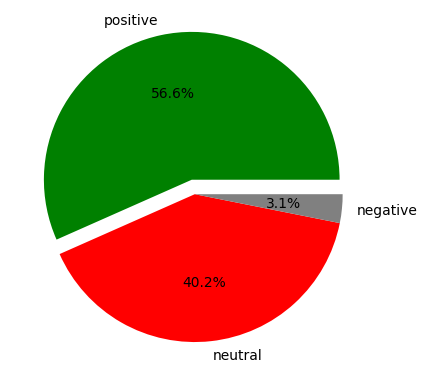

In [136]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df_impress_resp['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()